## Capstone Three Data Wrangling: Telco Customer Churn Use Case

In [8]:
import pandas as pd
import numpy as np

# Load the Telco Customer Churn dataset
telco_churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display basic information and the first few rows of the dataset
telco_initial_info = telco_churn_df.info()
telco_initial_head = telco_churn_df.head()

telco_initial_info, telco_initial_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovie

### Data Cleaning: Convert Data Types and Check for missing values

In [9]:
# Convert 'TotalCharges' from object to numeric (float). Errors='coerce' will replace non-convertible values with NaN.
telco_churn_df['TotalCharges'] = pd.to_numeric(telco_churn_df['TotalCharges'], errors='coerce')

# Check for new missing values in the dataset after conversion
missing_values = telco_churn_df.isnull().sum()
print(missing_values)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [11]:
# Investigate entries with missing 'TotalCharges'

# Filter rows where 'TotalCharges' is NaN
missing_total_charges = telco_churn_df[telco_churn_df['TotalCharges'].isnull()]

# Display these rows, particularly looking at 'tenure' and 'MonthlyCharges'
print(missing_total_charges[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']])


      customerID  tenure  MonthlyCharges  TotalCharges Churn
488   4472-LVYGI       0           52.55           NaN    No
753   3115-CZMZD       0           20.25           NaN    No
936   5709-LVOEQ       0           80.85           NaN    No
1082  4367-NUYAO       0           25.75           NaN    No
1340  1371-DWPAZ       0           56.05           NaN    No
3331  7644-OMVMY       0           19.85           NaN    No
3826  3213-VVOLG       0           25.35           NaN    No
4380  2520-SGTTA       0           20.00           NaN    No
5218  2923-ARZLG       0           19.70           NaN    No
6670  4075-WKNIU       0           73.35           NaN    No
6754  2775-SEFEE       0           61.90           NaN    No


In [12]:
# 0 in 'tenure' suggests that these customers might be in their first month of the subscription and the 'TotalCharges' are likely still 0.

# Assuming 'TotalCharges' should be 0 where 'tenure' is 0
telco_churn_df.loc[telco_churn_df['tenure'] == 0, 'TotalCharges'] = 0


In [13]:
# Check again for missing values
print(telco_churn_df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [14]:
# Check for duplicates

# Check for duplicate rows
duplicates = telco_churn_df.duplicated().sum()
print("Number of duplicate entries:", duplicates)

# Remove duplicate rows, if any
telco_churn_df = telco_churn_df.drop_duplicates()


Number of duplicate entries: 0


In [15]:
# Re-check Data Types and Structure

# Display updated DataFrame information
telco_churn_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# Check for Categorical data consistency

# List all columns that are of object type, which are typically categorical
categorical_columns = telco_churn_df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [17]:
# Print unique values in each categorical column to check for consistency
for column in categorical_columns:
    print(f"Unique values in {column}: {telco_churn_df[column].unique()}")


Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank t

<Axes: xlabel='MonthlyCharges'>

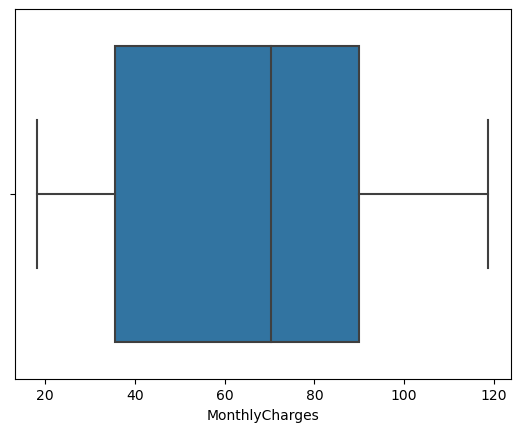

In [18]:
# Check for outliers
import seaborn as sns
sns.boxplot(x=telco_churn_df['MonthlyCharges'])


In [19]:
# Save the cleaned DataFrame to a new CSV file
telco_churn_df.to_csv('cleaned_telco_churn.csv', index=False)
